In [2]:
url="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"

In [3]:
url.split("/")[-1]

'housing.tgz'

In [4]:
# data ingestion

In [6]:
csv_file_path=r"C:\Users\prana\machine_learning_project_1\ml_projects\housing\artifact\data_ingestion\2022-07-01_00-17-27\raw_data\housing.csv"

In [8]:
df=pd.read_csv(csv_file_path)

<IPython.core.display.Javascript object>

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [15]:
df["income_cat"] = pd.cut(  # This is the dependent variable 
                df["median_income"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5])

# from this code i am trying to create categoried of the median income 
# labels are nothing but category
# this code will cot the median income into 5 categories

<IPython.core.display.Javascript object>

In [34]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


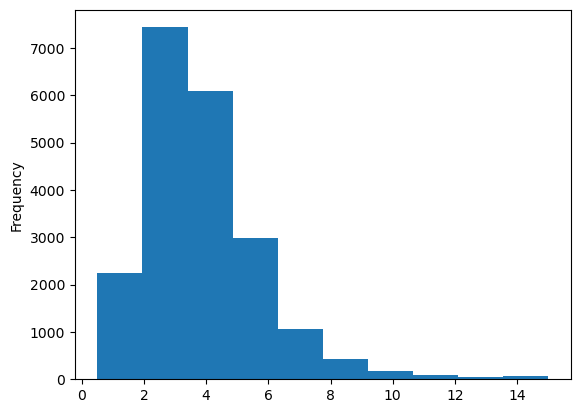

In [25]:
df["median_income"].plot(kind="hist")
plt.show()
# see this data is distributed 

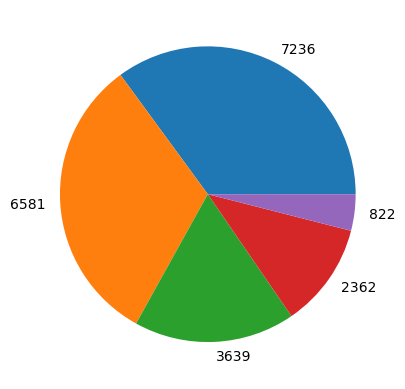

In [42]:
plt.pie(df.income_cat.value_counts(),labels=df.income_cat.value_counts())
plt.show()

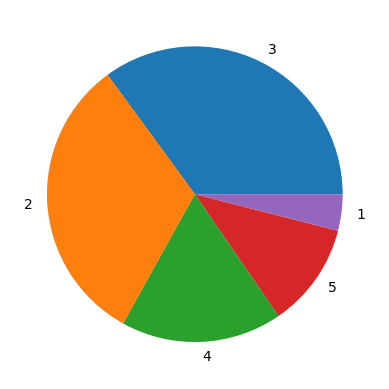

In [44]:
plt.pie(df.income_cat.value_counts(),labels=df.income_cat.value_counts().index)
plt.show()

In [45]:
# Now we are splitting the data 
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [46]:
split.split(df, df["income_cat"]) # this will give generator sot on extract thr data er have to use for loop

<generator object BaseShuffleSplit.split at 0x000001D42B0D9F90>

In [47]:
for train_index,test_index in split.split(df, df["income_cat"]):
    print(train_index,test_index)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [52]:
df.iloc[train_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [53]:
df.iloc[train_index].shape

(16512, 11)

In [73]:
d={}
lst=[]
for i in df.columns:
   d[i]=df[i].dtype

In [74]:
d

{'longitude': dtype('float64'),
 'latitude': dtype('float64'),
 'housing_median_age': dtype('float64'),
 'total_rooms': dtype('float64'),
 'total_bedrooms': dtype('float64'),
 'population': dtype('float64'),
 'households': dtype('float64'),
 'median_income': dtype('float64'),
 'median_house_value': dtype('float64'),
 'ocean_proximity': dtype('O'),
 'income_cat': CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)}

In [90]:
data_type=list(map(lambda x : str(x).replace("dtype('"," ").replace("')"," "),df.dtypes))


In [91]:

 data_type

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'object',
 'category']

In [110]:
columns=df.columns

In [115]:
schema_dict=dict(zip(columns,data_type))

In [114]:
import yaml

In [122]:
with open(r"C:\Users\prana\machine_learning_project_1\ml_projects\config\schema_file.yaml","w") as file:
    document=yaml.dump(schema_dict,file)